In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Rainfall.csv', parse_dates = True)
df

,id,date,state_code,state_name,actual,rfs,normal,deviation
0,0,01-01-2009,5,Uttarakhand,0.00,0.003906,2.19,-100.00
1,1,01-01-2009,18,Assam,0.00,0.000000,0.52,-100.00
2,2,01-01-2009,16,Tripura,0.00,0.000000,0.09,-100.00
3,3,01-01-2009,36,Telangana,0.00,0.000000,0.17,-100.00
4,4,01-01-2009,2,Himachal Pradesh,0.00,0.008566,3.31,-100.00
...,...,...,...,...,...,...,...,...
192469,192469,30-04-2023,33,Tamil Nadu,6.42,29.782906,1.35,375.56
192470,192470,30-04-2023,32,Kerala,13.60,18.935255,5.51,146.82
192471,192471,30-04-2023,11,Sikkim,13.71,3.333935,8.90,54.04
192472,192472,30-04-2023,7,Delhi,0.26,0.013232,0.60,-56.67


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192474 entries, 0 to 192473
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          192474 non-null  int64  
 1   date        192474 non-null  object 
 2   state_code  192474 non-null  int64  
 3   state_name  192474 non-null  object 
 4   actual      180810 non-null  float64
 5   rfs         187197 non-null  float64
 6   normal      176766 non-null  float64
 7   deviation   162693 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 11.7+ MB


In [4]:
df.dropna(inplace = True)

In [5]:
df['deviation'].value_counts()   #-100, It is not adding much value to the model

deviation
-100.00    64422
 0.00        200
-50.00       192
-90.00       158
-75.00       143
           ...  
 264.97        1
 498.61        1
 80.46         1
 80.31         1
 146.82        1
Name: count, Length: 32646, dtype: int64

In [6]:
df.drop(columns=['id', 'state_code', 'deviation'], inplace = True)

In [7]:
df

,date,state_name,actual,rfs,normal
0,01-01-2009,Uttarakhand,0.00,0.003906,2.19
1,01-01-2009,Assam,0.00,0.000000,0.52
2,01-01-2009,Tripura,0.00,0.000000,0.09
3,01-01-2009,Telangana,0.00,0.000000,0.17
4,01-01-2009,Himachal Pradesh,0.00,0.008566,3.31
...,...,...,...,...,...
192469,30-04-2023,Tamil Nadu,6.42,29.782906,1.35
192470,30-04-2023,Kerala,13.60,18.935255,5.51
192471,30-04-2023,Sikkim,13.71,3.333935,8.90
192472,30-04-2023,Delhi,0.26,0.013232,0.60


In [8]:
import time

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Convert datetime object to epoch time
df['epoch_time'] = df['date'].apply(lambda x: int(time.mktime(x.timetuple())))

print(df)

             date        state_name  actual        rfs  normal  epoch_time
0      2009-01-01       Uttarakhand    0.00   0.003906    2.19  1230748200
1      2009-01-01             Assam    0.00   0.000000    0.52  1230748200
2      2009-01-01           Tripura    0.00   0.000000    0.09  1230748200
3      2009-01-01         Telangana    0.00   0.000000    0.17  1230748200
4      2009-01-01  Himachal Pradesh    0.00   0.008566    3.31  1230748200
...           ...               ...     ...        ...     ...         ...
192469 2023-04-30        Tamil Nadu    6.42  29.782906    1.35  1682793000
192470 2023-04-30            Kerala   13.60  18.935255    5.51  1682793000
192471 2023-04-30            Sikkim   13.71   3.333935    8.90  1682793000
192472 2023-04-30             Delhi    0.26   0.013232    0.60  1682793000
192473 2023-04-30           Mizoram    0.01   0.005969   10.30  1682793000

[162693 rows x 6 columns]


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['Day'] = df['date'].dt.day

In [11]:
df['Month'] = df['date'].dt.month

In [12]:
df['Year'] = df['date'].dt.year

In [13]:
df

,date,state_name,actual,rfs,normal,epoch_time,Day,Month,Year
0,2009-01-01,Uttarakhand,0.00,0.003906,2.19,1230748200,1,1,2009
1,2009-01-01,Assam,0.00,0.000000,0.52,1230748200,1,1,2009
2,2009-01-01,Tripura,0.00,0.000000,0.09,1230748200,1,1,2009
3,2009-01-01,Telangana,0.00,0.000000,0.17,1230748200,1,1,2009
4,2009-01-01,Himachal Pradesh,0.00,0.008566,3.31,1230748200,1,1,2009
...,...,...,...,...,...,...,...,...,...
192469,2023-04-30,Tamil Nadu,6.42,29.782906,1.35,1682793000,30,4,2023
192470,2023-04-30,Kerala,13.60,18.935255,5.51,1682793000,30,4,2023
192471,2023-04-30,Sikkim,13.71,3.333935,8.90,1682793000,30,4,2023
192472,2023-04-30,Delhi,0.26,0.013232,0.60,1682793000,30,4,2023


In [14]:
df.drop(columns = ['date', 'epoch_time'], inplace = True)

In [15]:
df

,state_name,actual,rfs,normal,Day,Month,Year
0,Uttarakhand,0.00,0.003906,2.19,1,1,2009
1,Assam,0.00,0.000000,0.52,1,1,2009
2,Tripura,0.00,0.000000,0.09,1,1,2009
3,Telangana,0.00,0.000000,0.17,1,1,2009
4,Himachal Pradesh,0.00,0.008566,3.31,1,1,2009
...,...,...,...,...,...,...,...
192469,Tamil Nadu,6.42,29.782906,1.35,30,4,2023
192470,Kerala,13.60,18.935255,5.51,30,4,2023
192471,Sikkim,13.71,3.333935,8.90,30,4,2023
192472,Delhi,0.26,0.013232,0.60,30,4,2023


In [16]:
df[['actual','rfs','normal']].corr()

,actual,rfs,normal
actual,1.000000,0.504354,0.450340
rfs,0.504354,1.000000,0.189989
normal,0.450340,0.189989,1.000000


# HotEncoder for State_name

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['state_name'] = le.fit_transform(df['state_name'])
le

LabelEncoder()

In [19]:
import pickle

with open('encoder.pkl','wb') as file:
    pickle.dump(le,file)

In [20]:
X = df[['state_name', 'Day', 'Month', 'Year']]
y = df['rfs']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
scaler

StandardScaler()

In [24]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [25]:
results = {}

In [ ]:
from sklearn.svm import SVR
#Support Vector Regressor (SVR)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

In [34]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [26]:
from sklearn.linear_model import LinearRegression
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [27]:
lr_model

LinearRegression()

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()

rfr.fit(X_train,y_train)
preds = rfr.predict(X_test)

print(r2_score(y_test,preds))

0.5768221583228712


In [29]:
with open('model.pkl','wb') as file:
    pickle.dump(rfr,file)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error
# Calculate R2 score and RMSE for SVR
r2_svr = round(r2_score(y_test, y_pred_svr),3)
rmse_svr = round(np.sqrt(mean_squared_error(y_test, y_pred_svr)),3)
results['SVR'] = {'R2': r2_svr, 'RMSE': rmse_svr}
results['SVR']


{'R2': -0.025, 'RMSE': 29.471}

In [43]:
# Calculate R2 score and RMSE for Decision Tree
r2_dt = round(r2_score(y_test, y_pred_dt),3)
rmse_dt = round(np.sqrt(mean_squared_error(y_test, y_pred_dt)),3)
results['Decision Tree'] = {'R2': r2_dt, 'RMSE': rmse_dt}
results['Decision Tree']

{'R2': 0.306, 'RMSE': 24.247}

In [44]:
# Calculate R2 score and RMSE for Linear Regression
r2_lr = round(r2_score(y_test, y_pred_lr),3)
rmse_lr = round(np.sqrt(mean_squared_error(y_test, y_pred_lr)),3)
results['Linear Regression'] = {'R2': r2_lr, 'RMSE': rmse_lr}
results['Linear Regression']

{'R2': 0.008, 'RMSE': 28.993}

In [46]:
for model, metrics in results.items():
    print(f"{model}: R2 = {metrics['R2']:.3f}, RMSE = {metrics['RMSE']:.3f}")

SVR: R2 = -0.025, RMSE = 29.471
Decision Tree: R2 = 0.306, RMSE = 24.247
Linear Regression: R2 = 0.008, RMSE = 28.993


Text(0.5, 1.0, 'Support Vector Regression')

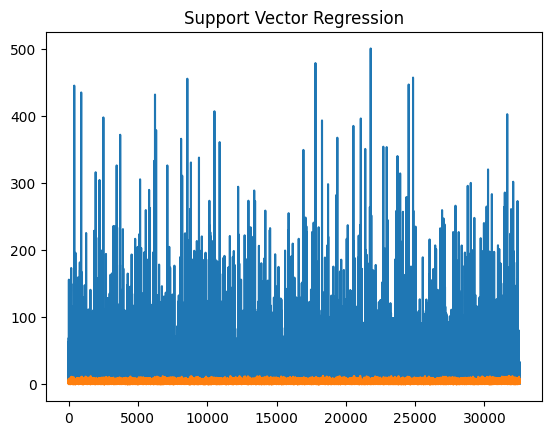

In [53]:
import matplotlib.pyplot as plt
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_svr, label='Predicted (SVR)', linestyle='--')
plt.title('Support Vector Regression')
# plt.legend()

Text(0.5, 1.0, 'Decision Tree Regressor')

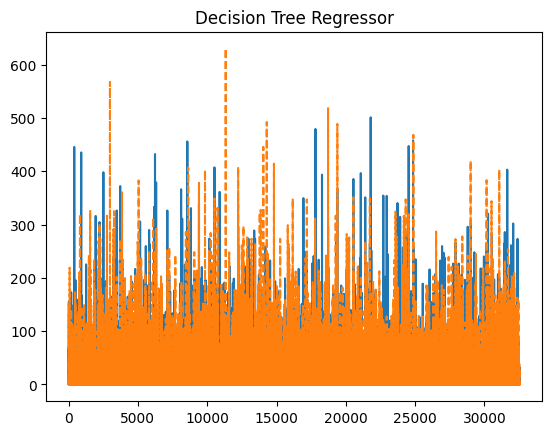

In [54]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_dt, label='Predicted (Decision Tree)', linestyle='--')
plt.title('Decision Tree Regressor')

Text(0.5, 1.0, 'Linear Regression')

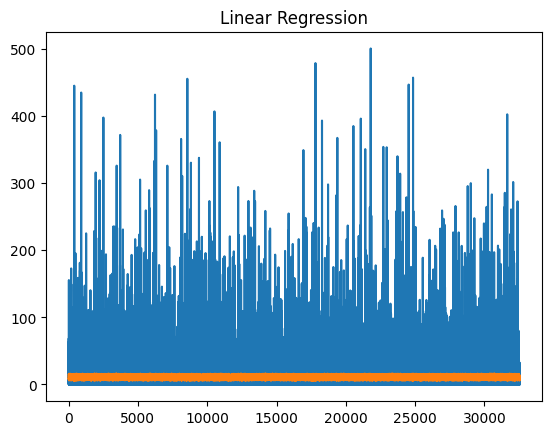

In [55]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Predicted (Linear Regression)', linestyle='--')
plt.title('Linear Regression')

In [37]:
def predictRainfall(state, day, month, year, model):
    state = state.strip().title()
    state_encoded = le.transform([state])[0]
    print(state_encoded)
    input_data = np.array([[state_encoded, day, month, year]])
    input_data_scaled = scaler.transform(input_data)
    if model == 'rfr':
        return rfr.predict(input_data_scaled)[0]
    elif model == 'Decision Tree':
        return dt_model.predict(input_data)[0]
    elif model == 'Linear Regression':
        return lr_model.predict(input_data)[0]
    else:
        raise ValueError("Model not recognized")

In [30]:
# state = input("Enter the state: ")
# day = int(input("Enter the day: "))
# month = int(input("Enter the month: "))
# year = int(input("Enter the year: "))
# predictedRFS = predictRainfall(state, day, month, year, 'Decision Tree')
# print(f"PREDICTED RAINFALL STORAGE IN {state} ON {day}-{month}-{year} IS: {predicted_rfs:.2f}")

Enter the state:  Kerala
Enter the day:  12
Enter the month:  5
Enter the year:  2025


NameError: name 'predictRainfall' is not defined

In [38]:
state = 'Kerala'
day = 30
month = 4
year = 2025
predictedRFS = predictRainfall(state, day, month, year, 'rfr')
print(f"Predicted rainfall storage for {state} on {day}-{month}-{year}: {predictedRFS:.2f}")

15
Predicted rainfall storage for Kerala on 30-4-2025: 0.53


C:\Users\SHIVANI H\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\SHIVANI H\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
